# クラスタリングの演習問題

**<font color="red">このファイルは、コピーして自分のドライブに保存しなければ、編集が保存されず、課題を提出できません。</font>**

**<font color="red">もしまだコピーしていなければ、「事前準備」レッスンの「Chapter 2
演習問題、提出課題について」を参考にしながら、左上の「ファイル」から「ドライブにコピーを保存」を選択して、必ずコピーを保存してください。</font>**

In [ ]:
import pandas as pd
from pandas import plotting
import matplotlib.pyplot as plt
from sklearn import cluster,preprocessing
import seaborn as sns

In [ ]:
# 練習問題(1)
import random
import pandas as pd

# データの個数
num_data = 100

# IDごとの条件を定義
column = ['X1', 'X2']
id_conditions = {
    range(0, 30): {'X1_mean': 50, 'X1_std': 20, 'X2_mean': 150, 'X2_std': 20},
    range(30, 50): {'X1_mean': 175, 'X1_std': 20, 'X2_mean': 75, 'X2_std': 20},
    range(50, 100): {'X1_mean': 95, 'X1_std': 20, 'X2_mean': 115, 'X2_std': 20}}

data = []
for i in range(num_data):
    for id_range, conditions in id_conditions.items():
        if i in id_range:
            X1 = random.normalvariate(conditions['X1_mean'], conditions['X1_std'])
            X2 = random.normalvariate(conditions['X2_mean'], conditions['X2_std'])
            data.append({'ID': i, 'X1': round(X1), 'X2': round(X2)})
            break

# データフレーム作成
df = pd.DataFrame(data)

# 表示
display(df)

,ID,X1,X2
0,0,17,152
1,1,86,173
2,2,34,135
3,3,80,148
4,4,73,143
...,...,...,...
95,95,68,107
96,96,107,120
97,97,111,125
98,98,59,81


In [ ]:
#2
df.describe().round()

,ID,X1,X2
count,100.0,100.0,100.0
mean,50.0,100.0,115.0
std,29.0,47.0,35.0
min,0.0,17.0,20.0
25%,25.0,68.0,93.0
50%,50.0,88.0,120.0
75%,74.0,124.0,141.0
max,99.0,226.0,190.0


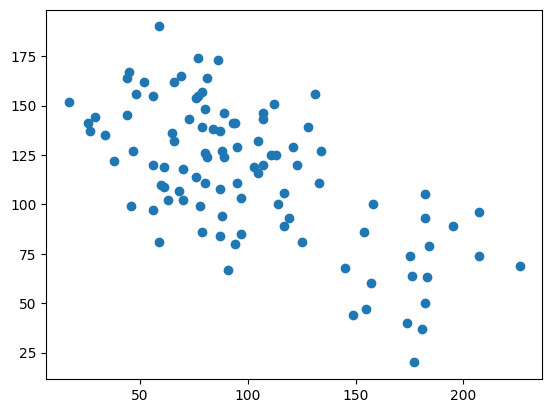

In [ ]:
#3
import matplotlib.pyplot as plt
plt.scatter(df['X1'], df['X2'])
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


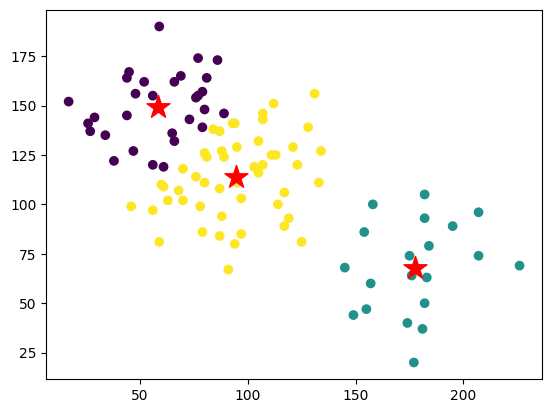

In [ ]:
#3,4,5
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df[['X1', 'X2']])
df['cluster'] = kmeans.labels_
plt.scatter(df['X1'], df['X2'], c=df['cluster'])
centroids = kmeans.cluster_centers_
for centroid in centroids:
    plt.scatter(centroid[0], centroid[1], c='red', marker='*', s=300)
plt.show()

In [ ]:
#7
result = kmeans.predict(df[['X1', 'X2']])
print(result)


[0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 2 2 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 2
 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2]


In [ ]:
#8
cluster_center = pd.DataFrame(kmeans.cluster_centers_, columns=['X1', 'X2'])
display(cluster_center)


,X1,X2
0,58.20,149.466667
1,177.45,67.900000
2,94.50,113.640000


# 主成分分析の演習問題

In [ ]:
# こちらのセルを実行してください。
import pandas as pd
from pandas import plotting
import matplotlib.pyplot as plt
from sklearn import cluster,preprocessing
import seaborn as sns

In [ ]:
#1
import random
import pandas as pd

num_data = 150
columns = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10']
data = {col: [] for col in columns}

id_conditions = {'X1_mean': 3, 'X1_std': 3,
                 'X2_mean': 5, 'X2_std': 2,
                 'X3_mean': 15, 'X3_std': 5,
                 'X4_mean': 100, 'X4_std': 10,
                 'X5_mean': 3, 'X5_std': 2,
                 'X6_mean': 3, 'X6_std': 2,
                 'X7_mean': 1, 'X7_std': 0.5,
                 'X8_mean': 3, 'X8_std': 1.5,
                 'X9_mean': 5, 'X9_std': 2,
                 'X10_mean': 3, 'X10_std': 1}

for col in columns:
    mean_key = f'{col}_mean'
    std_key = f'{col}_std'
    mean = id_conditions[mean_key]
    std = id_conditions[std_key]
    data[col] = [random.normalvariate(mean, std) for _ in range(num_data)]

df = pd.DataFrame(data)
display(df)



,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,2.303784,2.443124,15.326371,105.830905,0.670086,5.760637,0.439336,3.329277,4.770578,2.532116
1,4.313460,5.391024,3.133607,93.969962,4.278614,4.651673,0.876159,2.514572,5.634222,4.270129
2,5.246474,5.423706,10.467873,89.220976,2.439003,0.652307,1.285221,5.443835,4.306969,1.563398
3,2.572690,3.205739,10.330783,100.496885,4.750021,1.289007,1.280614,2.633373,4.733279,2.743907
4,5.404936,5.346921,12.826934,75.893796,1.812247,2.876040,0.927987,2.160595,5.892914,1.525847
...,...,...,...,...,...,...,...,...,...,...
145,1.690019,2.492582,21.758043,80.918454,2.511011,1.003053,1.277788,2.178231,3.194675,2.830110
146,3.539001,8.030680,19.571411,114.031777,6.234315,1.682307,1.002838,3.388545,5.860624,3.063178
147,-1.184632,3.315990,14.989488,80.237084,4.770957,10.326607,0.725666,3.578393,5.556860,2.419834
148,2.286568,0.818598,14.027997,93.273492,4.289887,2.327884,0.306758,2.345919,4.719047,0.757314


In [ ]:
#2
df.describe().round()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
count,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0
mean,3.0,5.0,15.0,100.0,3.0,3.0,1.0,3.0,5.0,3.0
std,3.0,2.0,5.0,11.0,2.0,2.0,0.0,1.0,2.0,1.0
min,-5.0,-0.0,1.0,75.0,-1.0,-2.0,-0.0,-2.0,0.0,0.0
25%,1.0,4.0,12.0,92.0,2.0,2.0,1.0,2.0,3.0,2.0
50%,3.0,5.0,15.0,100.0,3.0,3.0,1.0,3.0,5.0,3.0
75%,5.0,7.0,18.0,107.0,4.0,4.0,1.0,4.0,6.0,4.0
max,11.0,10.0,27.0,122.0,8.0,10.0,2.0,7.0,10.0,5.0


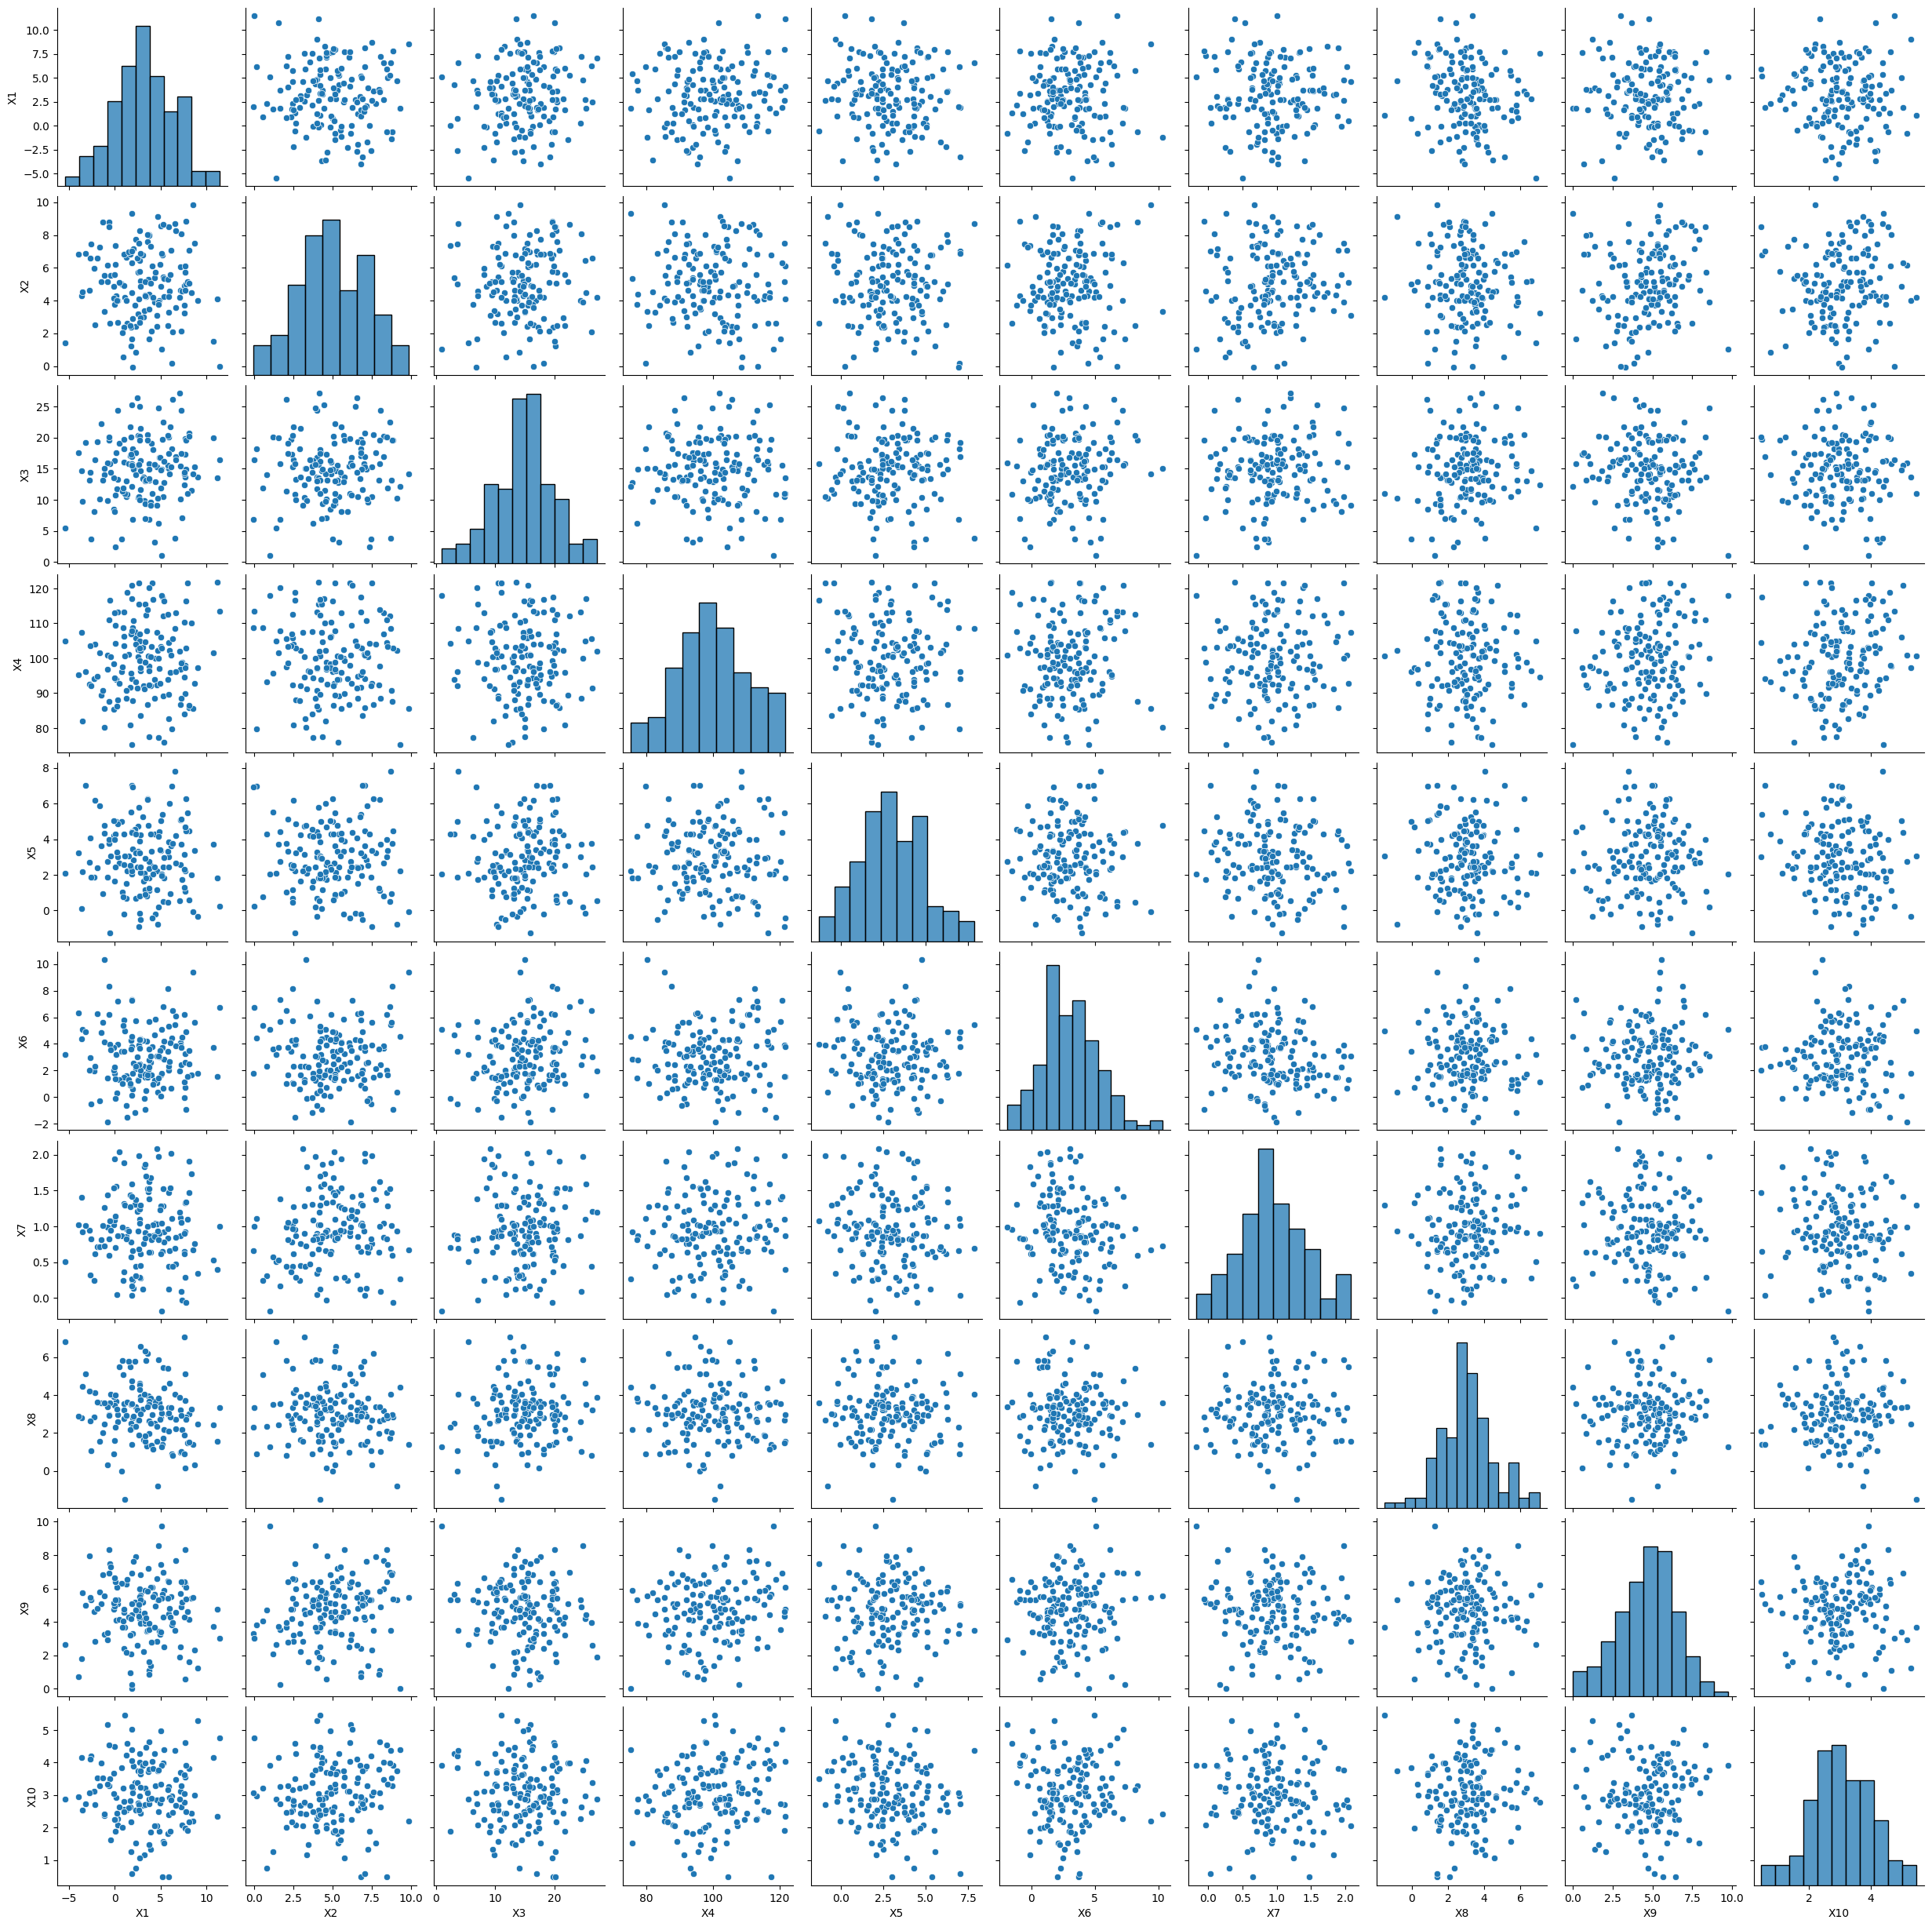

In [ ]:
#3
sns.pairplot(df)
plt.show()

In [ ]:
#4
from sklearn.decomposition import PCA
from sklearn import preprocessing
sc= preprocessing.StandardScaler()
x = df.iloc[:,0:]
x_norm = sc.fit_transform(x)

pca = PCA(random_state = 0)
x_pc = pca.fit_transform(x_norm)
df_pca = pd.DataFrame(x_pc)
df_pca.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']
display(df_pca,round(2))



,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-0.002402,0.713169,0.653252,-1.390508,0.991770,-0.188796,1.041560,-0.840087,-0.532168,-0.447242
1,-0.519226,1.689094,-0.975172,0.272788,-0.133989,0.917245,0.032503,-0.080940,1.722216,0.925563
2,0.990354,-1.395585,-0.934741,0.577630,-0.074928,-0.466365,1.510532,0.712805,1.101175,-0.586165
3,0.616099,0.185553,-1.178566,0.887735,0.459879,-0.658254,-0.314895,-0.218377,0.187682,0.578222
4,1.261058,0.045535,0.290146,0.984641,-0.966215,0.609245,2.188396,0.160834,-0.053295,0.527029
...,...,...,...,...,...,...,...,...,...,...
145,1.540300,-1.439245,0.275586,0.427449,0.523821,0.725793,0.047447,0.142689,-1.371205,1.247205
146,-0.452828,0.056182,0.001880,0.354060,-1.424641,-1.422960,-1.762223,0.847061,-0.053728,-0.642201
147,1.923580,1.070055,0.545902,-2.483811,-1.294791,0.359146,0.508079,-1.594004,0.741744,1.444916
148,2.665600,1.177831,-0.307098,0.136054,0.659753,-0.924743,1.010266,-0.238244,-1.048043,-0.221963


2

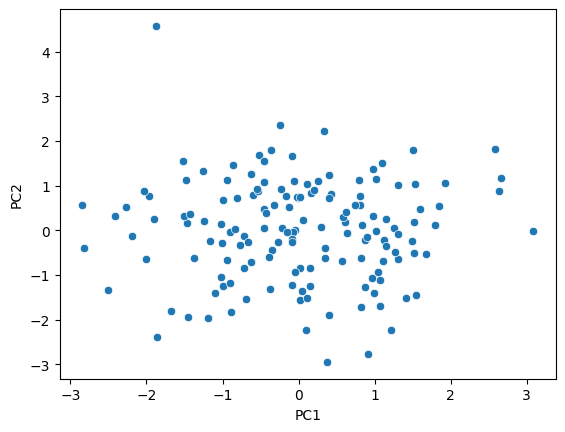

In [ ]:
#5
sns.scatterplot(x='PC1', y='PC2', data=df_pca)
plt.show()

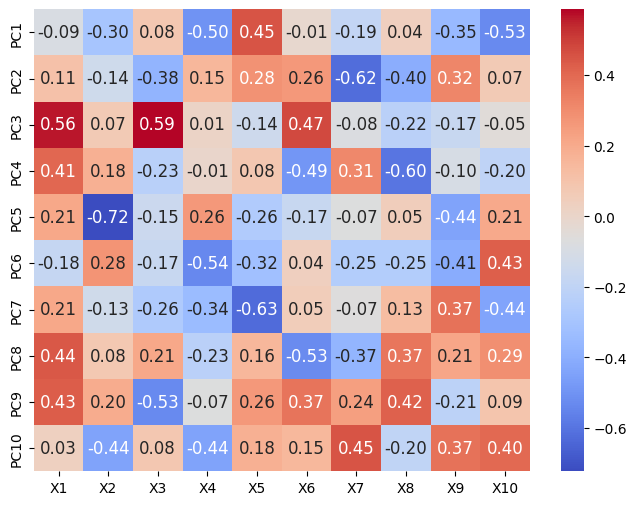

In [ ]:
#6
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
sns.heatmap(pca.components_, cmap='coolwarm', annot=True, annot_kws={'size': 12}, fmt = ".2f", ax=ax)
x_labels = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10']
ax.set_xticklabels(x_labels)
y_labels = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']
ax.set_yticklabels(y_labels)
plt.show()